# Tetris Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

tetris_data = pd.read_csv('tl-data-09-2023.csv')


In [6]:
tetris_data.head(20)

,id,username,gamesplayed,gameswon,tr,glicko,rd,rank,bestrank,apm,pps,vs,verified,country,40l_sprint,blitz
0,5e844b0868270e617d52c990,czsmall0402,442,417,24999.398155,4310.378695,89.356040,x,x,189.12,3.21,378.93,True,NaN,18.39,828316.0
1,5e697bbf77aba60f95fb38da,firestorm,3690,2894,24999.116980,4193.225768,73.232078,x,x,183.79,3.40,364.77,True,KR,17.99,1363531.0
2,615fb20fe17beeef45104302,blaarg,2148,1821,24999.103938,4188.196199,71.459517,x,x,185.91,3.70,363.16,True,US,15.31,NaN
3,5f5dbcc4454e942b4fdfc5fa,vincehd,1331,881,24998.696817,4089.441888,70.983747,x,x,182.41,3.54,375.53,True,PH,15.30,1145320.0
4,5e88d0ead351fa71316ba29e,promooooooo,4031,2576,24998.586047,4067.895810,70.828891,x,x,176.67,3.49,342.16,True,AQ,15.75,1101993.0
5,5e912413de03bc77bc821f65,rideris,559,405,24998.295359,4027.405318,81.046386,x,x,174.68,3.67,345.93,True,NaN,16.37,NaN
6,5eb11da1e47b643b5d12e5f1,kazu,1741,1337,24997.509888,3938.830684,93.247120,x,x,183.79,3.47,344.71,False,JP,19.17,771490.0
7,5e89fca2fd676e407898adbe,fortissim2,1395,996,24997.492488,3917.889101,71.391533,x,x,165.10,3.19,334.99,True,CA,14.73,1789323.0
8,61990d780bf7c9b332b2bcb5,togaiats,677,487,24997.070825,3876.005574,86.957614,x,x,163.48,3.77,334.80,False,BR,26.30,638994.0
9,61539ab787e8d6bee31046b1,coffilter,1309,890,24996.604323,3844.260016,79.143901,x,x,179.84,3.28,341.52,False,CN,15.77,1091186.0


# Introduction

Tetr.io is a version of the classic puzzle game Tetris that allows multiple players to compete against each other over the internet. Players can connect with friends or random opponents from around the world to test their Tetris skills in real-time. This multiplayer mode adds an exciting and competitive element to the game, as players strive to outscore and outlast their opponents.

## Garbage Sending

In online multiplayer Tetris, players have the ability to send garbage lines to their opponents. Garbage lines are additional rows of blocks that appear at the bottom of the opponent's playfield, making it more challenging for them to clear lines. The number of garbage lines sent is determined by the player's performance, such as clearing multiple lines in a single move or performing special moves like T-spins.

## Combos

Combos are an important aspect of online multiplayer Tetris. A combo occurs when a player clears multiple lines in quick succession. Each consecutive line cleared in a combo sends additional garbage lines to the opponent. Combos can be achieved by strategically placing blocks to create chain reactions, allowing players to send large amounts of garbage lines and put pressure on their opponents.

## T-Spins

T-Spins are advanced moves in Tetris that involve rotating a T-shaped tetromino into a tight space. When a T-Spin is performed, the player is rewarded with extra points and can send additional garbage lines to their opponent. T-Spins require precise timing and skillful maneuvering of the tetrominoes, making them a challenging but rewarding technique to master in online multiplayer Tetris.

## Terminology required

### Glicko
A method of measuring a person's skill

### apm
Attacks per minute, or how much garbage sent every minute

### pps
pieces placed per second

### vs
versus score, or how much garbage sent for each line cleared

# Which statistic contributes the most to a player's rating, such as APM, PPS, or VS?

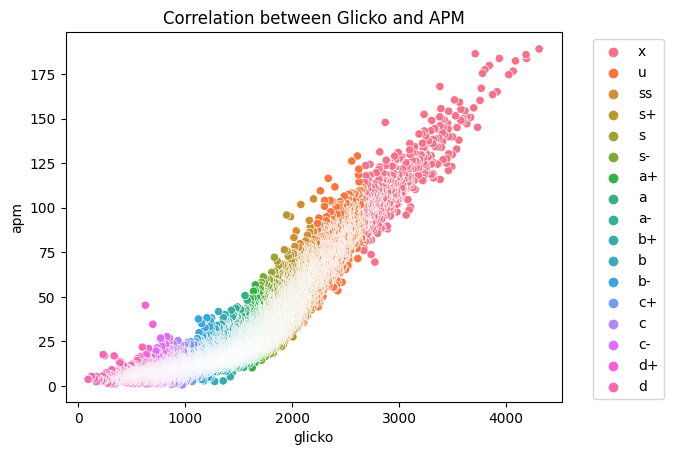

Correlation: 0.8805164367952116


In [4]:
sns.scatterplot(data=tetris_data, x='glicko', y='apm', hue='rank')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Correlation between Glicko and APM")
plt.show()
correlation_coefficient = tetris_data['glicko'].corr(tetris_data['apm'])
print("Correlation: " + str(correlation_coefficient))

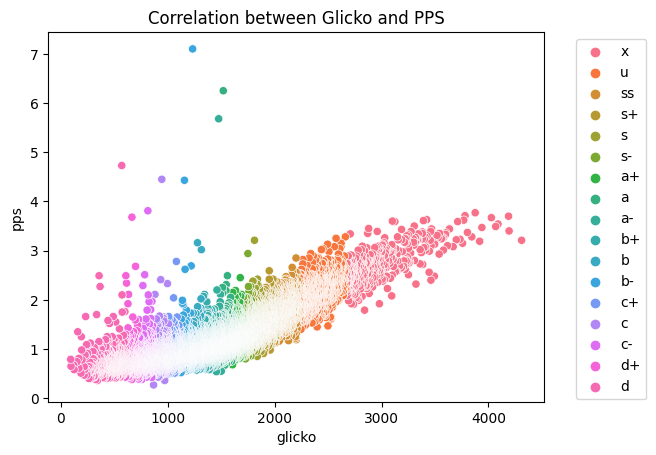

Correlation: 0.863690768124685


In [5]:
sns.scatterplot(data=tetris_data, x='glicko', y='pps', hue='rank')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Correlation between Glicko and PPS")
plt.show()
correlation_coefficient = tetris_data['glicko'].corr(tetris_data['pps'])
print("Correlation: " + str(correlation_coefficient))

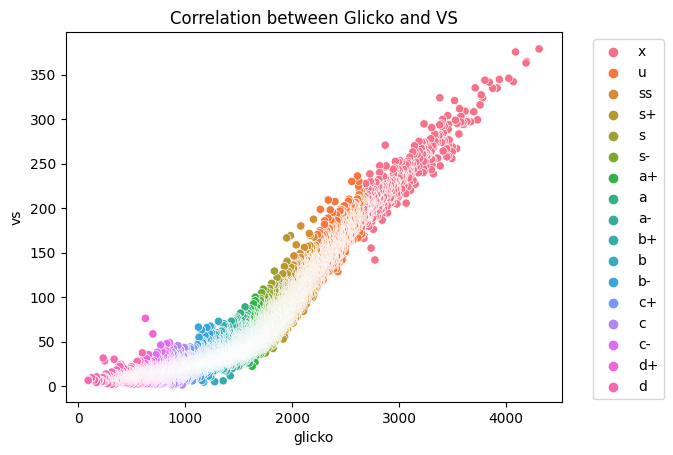

Correlation: 0.9016260234952909


In [9]:
sns.scatterplot(data=tetris_data, x='glicko', y='vs', hue='rank')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Correlation between Glicko and VS")
plt.show()
correlation_coefficient = tetris_data['glicko'].corr(tetris_data['vs'])
print("Correlation: " + str(correlation_coefficient))

After looking at the graphs and the correlation coefficients between the rating of a player and their stats, we can see that the correlation between the "vs" score and "glicko" rating is the closest to 1. Therefore, we can conclude that improving your "vs" score is the best way to increase your rank. 

The "vs" score can be increased by sending more garbage lines to your opponent per line cleared. For example, a tetris clears 4 lines and sends 4 lines, while a t-spin clears 2 lines and sends 4 lines. The most efficient move is a perfect clear, which clears 4 lines while sending 10 lines.

# How does 40 line and blitz require different skills

40 line sprint is how fast you can clear 40 lines, therefore a lower time is better.

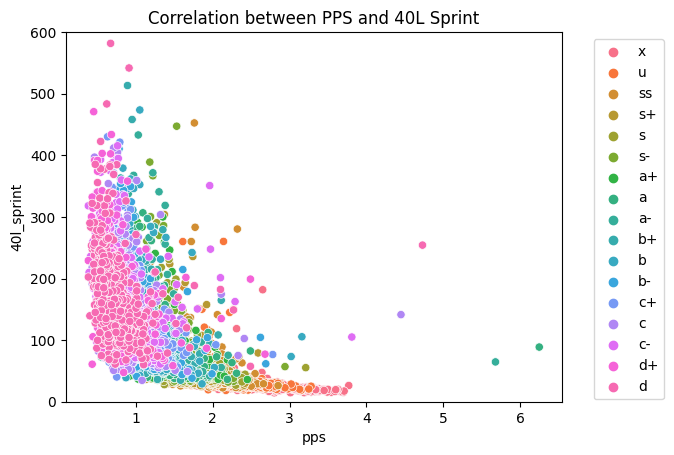

Correlation: 0.6757558370821237


In [6]:
sns.scatterplot(data=tetris_data, x='pps', y='40l_sprint', hue='rank')
plt.ylim(0, 600)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Correlation between PPS and 40L Sprint")
plt.show()
correlation_coefficient = tetris_data['pps'].corr(tetris_data['40l_sprint'])
print("Correlation: " + str(abs(correlation_coefficient)))

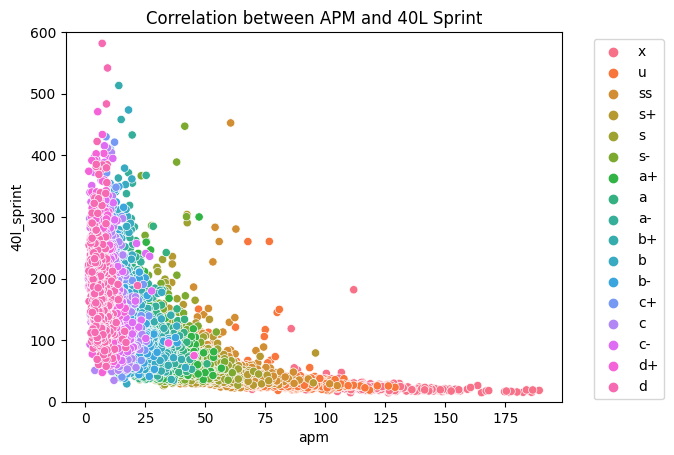

Correlation: 0.6070640032457375


In [8]:
sns.scatterplot(data=tetris_data, x='apm', y='40l_sprint', hue='rank')
plt.ylim(0, 600)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Correlation between APM and 40L Sprint")
plt.show()
correlation_coefficient = tetris_data['apm'].corr(tetris_data['40l_sprint'])
print("Correlation: " + str(abs(correlation_coefficient)))

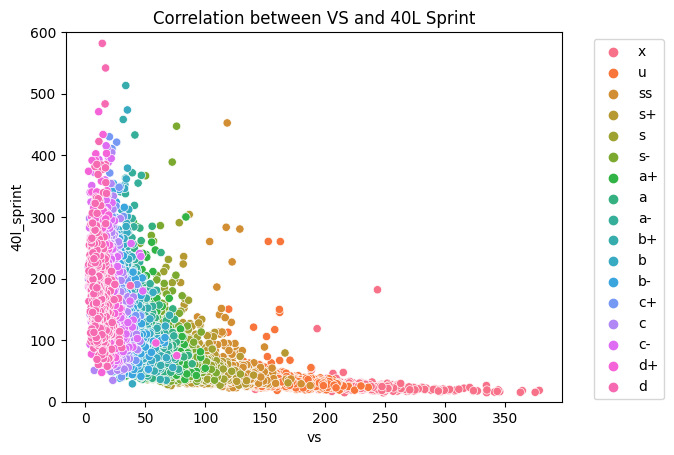

Correlation: 0.6155871866213336


In [10]:
sns.scatterplot(data=tetris_data, x='vs', y='40l_sprint', hue='rank')
plt.ylim(0, 600)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Correlation between VS and 40L Sprint")
plt.show()
correlation_coefficient = tetris_data['vs'].corr(tetris_data['40l_sprint'])
print("Correlation: " + str(abs(correlation_coefficient)))

The correlation coefficient between the three statistics (pps, apm, and vs) and the 40 line sprint time indicates that all three have a positive correlation. However, pps stands out as the most influential statistic in improving your 40 line score. With a correlation coefficient of approximately 0.68, pps has a stronger relationship compared to apm and vs, which have a correlation coefficient of around 0.61. This finding aligns with the notion that faster piece placement directly contributes to quicker clearance of 40 lines. Other factors such as attacks per minute or executing t-spins and combos may not be as crucial as pure speed will help achieve a better 40 line score.

Blitz is a gamemode that measures how many points you can score in two minutes of playtime, with different scores given out for lines cleared, combos, t-spins, perfect clears, etc.

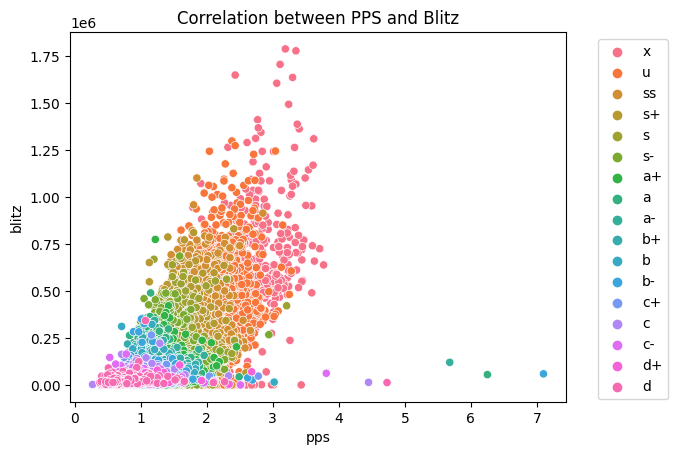

Correlation: 0.7302174621266593


In [11]:
sns.scatterplot(data=tetris_data, x='pps', y='blitz', hue='rank')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Correlation between PPS and Blitz")
plt.show()
correlation_coefficient = tetris_data['pps'].corr(tetris_data['blitz'])
print("Correlation: " + str(correlation_coefficient))

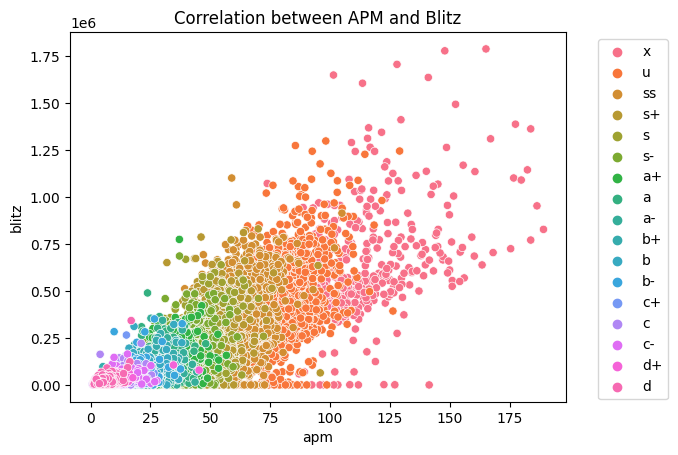

Correlation: 0.8303818708459092


In [12]:
sns.scatterplot(data=tetris_data, x='apm', y='blitz', hue='rank')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Correlation between APM and Blitz")
plt.show()
correlation_coefficient = tetris_data['apm'].corr(tetris_data['blitz'])
print("Correlation: " + str(correlation_coefficient))

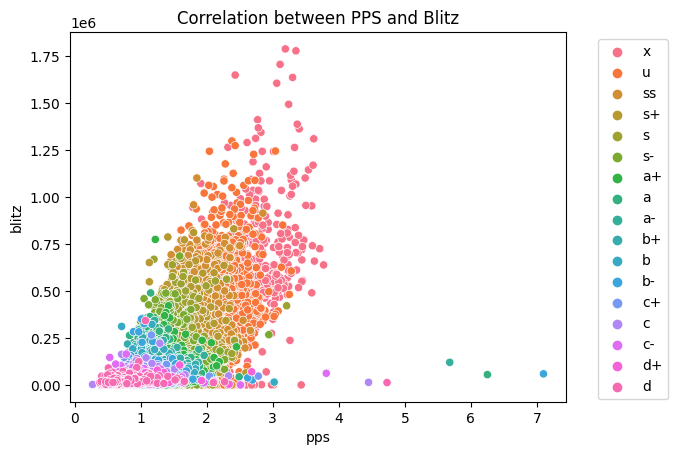

Correlation: 0.7302174621266593


In [13]:
sns.scatterplot(data=tetris_data, x='pps', y='blitz', hue='rank')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Correlation between PPS and Blitz")
plt.show()
correlation_coefficient = tetris_data['pps'].corr(tetris_data['blitz'])
print("Correlation: " + str(correlation_coefficient))

The correlation coefficient between the three statistics (pps, apm, and vs) and the blitz scores indicates a positive correlation for all three. However, apm stands out as the most influential statistic in improving your blitz score. With a correlation coefficient of approximately 0.83, apm has a stronger relationship compared to pps and vs, which have a correlation coefficient of around 0.73. This finding also aligns with the notion that more attacks directly contribute to a better blitz score. Other factors such as placement speed and timing of attacks and spikes may not be as crucial as pure attacks like perfect clear spams and mass t-spins, which help achieve a better blitz score.

# Will playing more make you better?


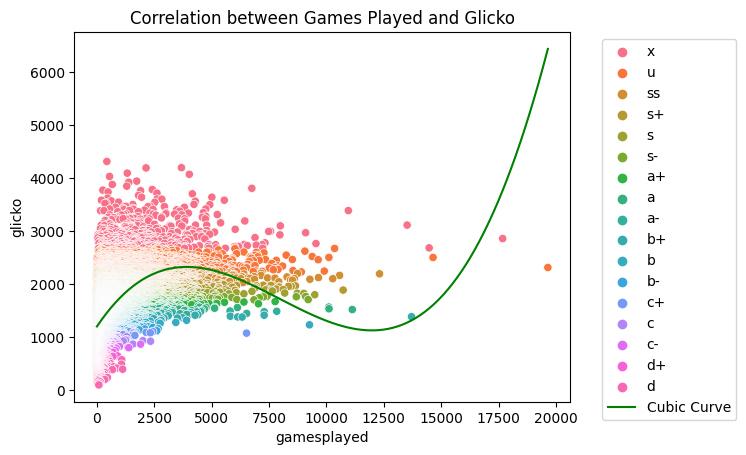

Correlation: 0.5200643912805235


In [16]:
# Fit a cubic curve to the data
coefficients = np.polyfit(tetris_data['gamesplayed'], tetris_data['glicko'], 3)
x = np.linspace(tetris_data['gamesplayed'].min(), tetris_data['gamesplayed'].max(), 100)
y = np.polyval(coefficients, x)

# Plot the scatterplot and cubic curve
sns.scatterplot(data=tetris_data, x='gamesplayed', y='glicko', hue='rank')
plt.plot(x, y, color='green', label='Cubic Curve')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Correlation between Games Played and Glicko")
plt.show()

# Calculate the correlation coefficient
correlation_coefficient = tetris_data['gamesplayed'].corr(tetris_data['glicko'])
print("Correlation: " + str(correlation_coefficient))

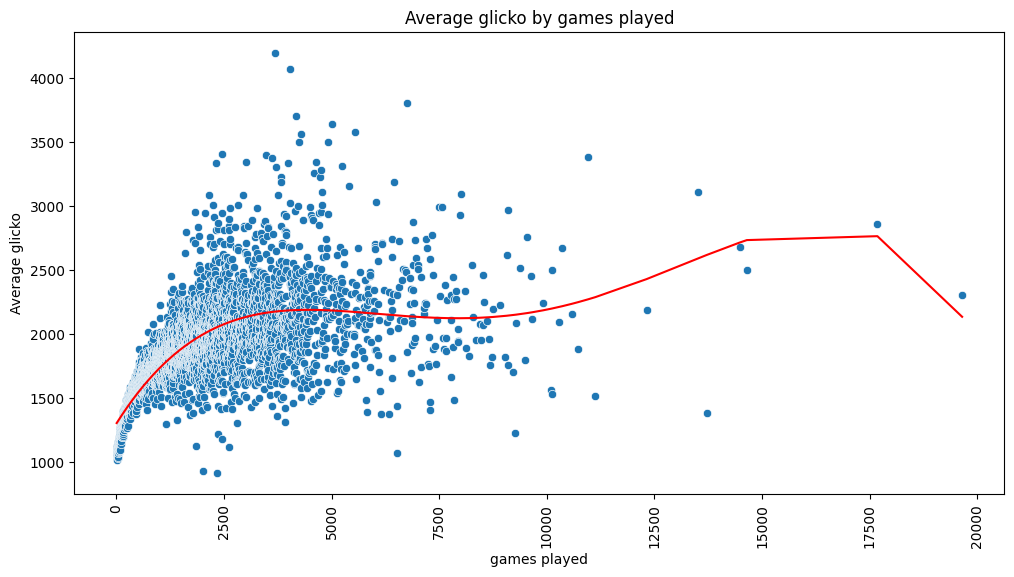

In [17]:
average_tr_by_gamesplayed = tetris_data.groupby('gamesplayed')['glicko'].mean()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=average_tr_by_gamesplayed, x=average_tr_by_gamesplayed.index, y=average_tr_by_gamesplayed.values)
plt.xticks(rotation=90)
plt.xlabel('games played')
plt.ylabel('Average glicko')
plt.title('Average glicko by games played')

# Calculate the line of best fit
x = average_tr_by_gamesplayed.index
y = average_tr_by_gamesplayed.values
coefficients = np.polyfit(x, y, 4)

# Create the quartic equation
equation = f"{coefficients[0]}x^4 + {coefficients[1]}x^3 + {coefficients[2]}x^2 + {coefficients[3]}x + {coefficients[4]}"

# Plot the line of best fit
plt.plot(x, np.polyval(coefficients, x), color='red')

plt.show()

After analyzing the relationship between games played and the rating, we can see that while one can definitely improve initially by practicing, there is a skill ceiling for the average player. This makes sense because Tetris is a visually spatial IQ-heavy game, and individuals with lower IQ may struggle to imagine the patterns required for efficient Tetris as easily as those with higher IQ. So, no matter how much the average player practices, they may face limitations in reaching the same level of skill as others.